### Christopher Olah's blog link for MNIST and PCA
https://colah.github.io/posts/2014-10-Visualizing-MNIST/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
d0 = pd.read_csv("MNIST_train.csv")

In [4]:
d0.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
d0.shape

(42000, 785)

In [6]:
# We can see we have 42000 datapoints(images) and 785(784 + 1) columns.
# 784 columns contains image data of X matrix and 1 column is containing Y value which is label.
# But we need only X matric for now.

In [7]:
# save label column in l, This l will work as Y(nx1) matrix.
l = d0['label']

In [8]:
# Now make a dataframe with X values only.
d1 = d0.drop('label', axis=1)

In [9]:
d1.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# PCA for 2D visualization

In [10]:
# Now we will plot a 2d graph of first 15000 datapoints. 
# But we have 784d data. So We will project all our data to only 2 dimensions Using PCA. So we can plot a 2d graph of same data.

### Picking first 15000 datapoints.

In [11]:
raw_data = d1.head(15000)
Y = l.head(15000)

print("Shape of Non standardized X matrix:", raw_data.shape)   # 15000 datapoints where each datapoint has 784 features.
print("Shape of Y matrix:", Y.shape)   # (nx1) ==> 15000x1

Shape of Non standardized X matrix: (15000, 784)
Shape of Y matrix: (15000,)


In [12]:
raw_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# mean and std before standardization.

print("shape of 500th column:", raw_data['pixel500'].shape)
print("mean of ith column", raw_data['pixel500'].mean())
print("std  of ith column", raw_data['pixel500'].std())

print()
print("shape of 428th column:", raw_data['pixel428'].shape)
print("mean of ith column", raw_data['pixel428'].mean())
print("std  of ith column", raw_data['pixel428'].std())

shape of 500th column: (15000,)
mean of ith column 5.0542
std  of ith column 30.385542852502486

shape of 428th column: (15000,)
mean of ith column 71.35066666666667
std  of ith column 103.1757021521445


### Step 1: Column Standardization

In [14]:
# now we will perform column standardization on  Matrix X.
# Means for each column, we will perform { value - mean(column) / std(column) }

# Instead of applying furmula on each value of each column, we will use StandardScaler() method of sklearn library.

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(raw_data)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
X.shape

(15000, 784)

In [16]:
# Accessing ith column of Standardised Matrix X
i = 28
print(X[:, i])  # select all rows but only ith column. 

# don't get confuse it is not the 15th row because any row in X has only 784 values.
# now we will calculate it's mean and std to see if data is really standardized or not.

print("shape of this column:", X[:, i].shape)  # 15000x1 means it's a column. if i=28, It means this columns is containing 
print("mean of ith column", X[:, i].mean())    # 28th pixel value for each datapoint in X.
print("std  of ith column", X[:, i].std())
print()
i = 500
print("shape of this column:", X[:, i].shape)   # i = 500th column
print("mean of ith column", X[:, i].mean())
print("std  of ith column", X[:, i].std())
print()
i = 428
print("shape of this column:", X[:, i].shape)   # i = 428th column
print("mean of ith column", X[:, i].mean())
print("std  of ith column", X[:, i].std())

# don't mis-interpret the mean values they are near to 0.0
# Notice std is 1 in both i=500 and i=428. It means columns are standardised.
# In i=28 std and mean both are zero because all column values are 0. Which is possible for 28th column.

[0. 0. 0. ... 0. 0. 0.]
shape of this column: (15000,)
mean of ith column 0.0
std  of ith column 0.0

shape of this column: (15000,)
mean of ith column -1.7053025658242403e-17
std  of ith column 1.0

shape of this column: (15000,)
mean of ith column 2.842170943040401e-18
std  of ith column 1.0


### Step 2: Calculating Covariance matrix for X
### S = X.T . X

In [17]:
# We will use matmul() method (Matrix Multiplication) of numpy to calculate covariance matrix of X.
# It will be a (784x784) matrix. Where we have calculated co-variance of all columns with each other.
# This matrix will show how any ith column is co-related with any other jth column. Here i,j:{1,2,3.....784} 

In [20]:
covariance_mat = np.matmul(X.T, X)  # matmul is equal to DOT product.

print("Shape of Co-variance Matrix:", covariance_mat.shape)

Shape of Co-variance Matrix: (784, 784)


### Step 3: Calculating top 2 eigen values and there coressponding eigen vactors.

In [21]:
# these top 2 eigen vectors will be used in projecting all our 784d data onto 2 dimensions.
# to calculate eigen values we will use scipy library's linalg module's eigh() method. linalg means linear algebra.

from scipy.linalg import eigh

In [23]:
e_values , e_vectors = eigh(covariance_mat, eigvals=(782, 783))

# Because our S is 784x784 matrix. Means we will get total 784 eig_values and eig_vectors.
# But we don't need all 784 eig_values. We need only top 2 eigen values.
# Our eigh() method puts all eigen values in sorted and accending order. So if we calclate eig_values for our 784x784
# co-var matrix 0th, 1st, 2nd.... will be smallest eigen values and 781th, 782th, 783th will be largets eigen values.
# And eigh() method gives us the flexiblity to calculate any eigen value by it's index.
# So we can calculate only last 2 values, which are 782th second large and 783th largest eigen values.

# So by running above code e_values = [782th e_val, 783th e_val]      (array of values at 0th and 1st index)
#                         e_vectors = [782th e_vec, 783th e_vec]      (array of vectors at 0th and 1st index)

# also notice e_values = [lambda2, lambda1]  where lambda1 > lambda2
#            e_vectors = [  V2,      V1   ]

In [27]:
print("eigen values:", e_values)
e_vectors

eigen values: [435532.55785282 605719.29173629]


array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [28]:
e_vectors.shape

# 784 rows and 2 columns.
# Means We have 2 columns with 784 vlaues in each column.

# Eigen values are only 2 scalers.

(784, 2)

### Step 4: Projecting all the datapoints on V1 and V2 directions. 

In [29]:
# Now dot product of Matrix X with [V2, V1] will project all 15000 points onto V2 and V1
print("X shape:", X.shape)
print("e_vectors shape:", e_vectors.shape)

X shape: (15000, 784)
e_vectors shape: (784, 2)


In [30]:
# Which means we can dot product X and e_vectors because columns of X(d=784) is equal to rows of e_vectors(n=784)
# And the resultent matrix will be of 15000x2. Means 2 newly created columns(features) and 15000 datapoints.

new_coordinates = np.matmul(X, e_vectors)

In [31]:
new_coordinates

array([[-5.5586608 , -5.04355835],
       [ 6.19363477, 19.30527806],
       [-1.90987794, -7.67877525],
       ...,
       [-2.14793723, -1.50726893],
       [ 3.20412249, -6.53731291],
       [-6.87896871, -1.25625388]])

### Step 5: Visualise newly created features on a 2D plot.

In [34]:
# making dataframe for visualization.

X_dash = pd.DataFrame(data = new_coordinates, columns=("2nd_principal", "1st_principal") )

In [35]:
X_dash

,2nd_principal,1st_principal
0,-5.558661,-5.043558
1,6.193635,19.305278
2,-1.909878,-7.678775
3,5.525748,-0.464845
4,6.366527,26.644289
...,...,...
14995,3.139416,-4.758956
14996,1.946714,-1.314215
14997,-2.147937,-1.507269
14998,3.204122,-6.537313


In [36]:
# Adding labels to use as hue value in plot.
X_dash['label'] = Y

In [37]:
X_dash

,2nd_principal,1st_principal,label
0,-5.558661,-5.043558,1
1,6.193635,19.305278,0
2,-1.909878,-7.678775,1
3,5.525748,-0.464845,4
4,6.366527,26.644289,0
...,...,...,...
14995,3.139416,-4.758956,1
14996,1.946714,-1.314215,4
14997,-2.147937,-1.507269,8
14998,3.204122,-6.537313,9


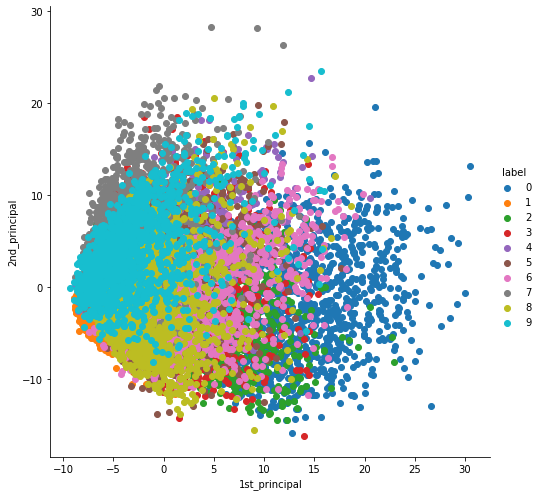

In [40]:
# Ploting the data

sns.FacetGrid(X_dash, hue='label', height=7).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()